# Avocado Project

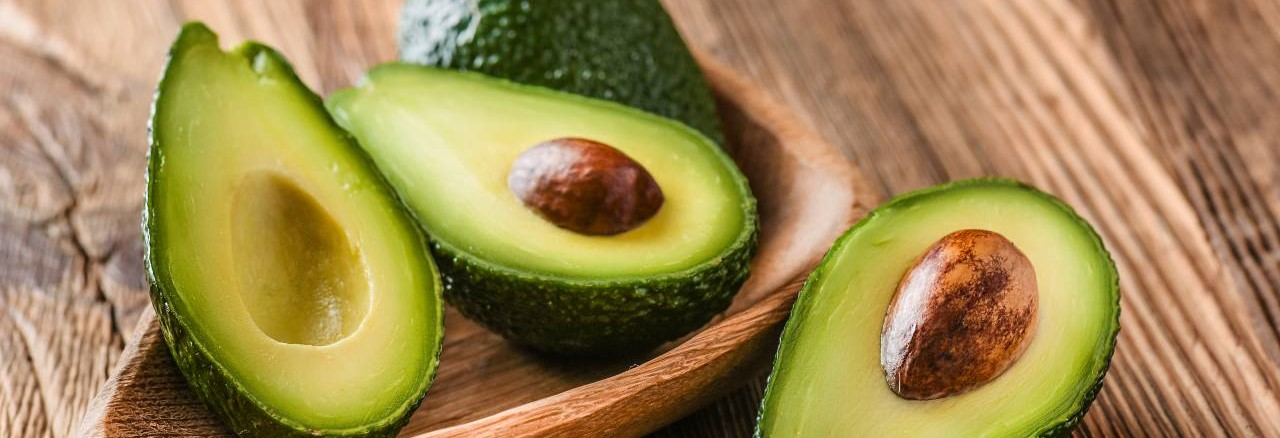

Dataset  

    This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
    The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
    Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
    The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
 


Input features

    •	Date - The date of the observation
    •	AveragePrice - the average price of a single avocado
    •	type - conventional or organic
    •	year - the year
    •	Region - the city or region of the observation
    •	Total Volume - Total number of avocados sold
    •	4046 - Total number of avocados with PLU 4046 sold
    •	4225 - Total number of avocados with PLU 4225 sold
    •	4770 - Total number of avocados with PLU 4770 sold


Output label  
    
    Region (Classification model)
    AveragePrice (Regression model)
    

Aim: 
 
    Develop machine learning models to predict the average price of avocado (Regression model) and predict the region (Classification model) based on different features 

In [200]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [201]:
# load the dataset

av_df=pd.read_csv(r"C:\Users\gowri\Downloads\avocado.csv\avocado.csv")
av_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data pre-processing, Feature engineering & EDA

In [202]:
# create a copy of the dataset for analysis

av_df1=av_df.copy()

In [203]:
av_df1.shape

(18249, 14)

In [204]:
av_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [205]:
av_df1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [206]:
av_df1.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Observation:  

    There are 18249 records in the dataset with 14 columns 
    There are no nulls observed in the dataset  
    The 14 columns have these datatypes: float64(9), int64(2), object(3)

In [207]:
av_df1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [208]:
# drop "Unnamed: 0" column as its unnecessary

av_df1.drop('Unnamed: 0',axis=1,inplace=True)

In [209]:
# check number of unique values in each column

unique=av_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [210]:
# take the count of each unique value in each column

for i in av_df1.columns:
    print(av_df1.value_counts(av_df1[i]),'\n')

Date
2015-01-04    108
2017-01-08    108
2017-01-22    108
2017-01-29    108
2017-02-05    108
             ... 
2016-02-21    108
2018-03-25    108
2015-12-06    107
2017-06-25    107
2017-06-18    107
Name: count, Length: 169, dtype: int64 

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.78      1
2.68      1
0.46      1
0.48      1
3.25      1
Name: count, Length: 259, dtype: int64 

Total Volume
3713.49        2
3288.85        2
7223.46        2
2038.99        2
9465.99        2
              ..
20247.87       1
20251.16       1
20254.68       1
20261.00       1
62505646.52    1
Name: count, Length: 18237, dtype: int64 

4046
0.00           242
3.00            10
4.00             8
1.00             8
1.24             8
              ... 
2248.94          1
2250.10          1
2251.48          1
2251.54          1
22743616.17      1
Name: count, Length: 17702, dtype: int64 

4225
0.00           61
215.36          3
177.87          3
94.74      

Observation:  

    Average price of single avocados range from 0.44 to 3.25  
    The dataset contains information from the years: 2015-2018
    Dataset include details of 2 types of avocados across 54 regions in the United States

In [211]:
# check for duplicates

duplicates=av_df1.duplicated()

print('No. of duplicates in the dataset: ', av_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', av_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [213]:
# convert datatype of Date to datetime format

av_df1['Date']=pd.to_datetime(av_df1['Date'])

In [214]:
# extract day, month and year from date column

av_df1['Day'],av_df1['Month']=av_df1['Date'].dt.day, av_df1['Date'].dt.month
av_df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [216]:
av_df1.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Day                      int32
Month                    int32
dtype: object

In [217]:
# functions to analyse data

In [218]:
# Price vs type

def price_vs_type(df):
    plt.figure(figsize=(4,3))
    sns.barplot(x='AveragePrice',y='type',data=df, palette='viridis')
    plt.show()

In [219]:
# Price vs region

def price_vs_region(df):
    
    price_region =df.groupby(['region','type'])['AveragePrice'].mean().sort_values(ascending=False).reset_index()
    top10 =price_region.head(10).reset_index()
    top10_df=pd.DataFrame(top10)

    plt.figure(figsize=(6,3))
    sns.barplot(x='region', y='AveragePrice',palette='viridis',hue='type', data=top10_df)

    plt.xlabel('Region in US')
    plt.ylabel('Average Price of Avocados')
    plt.xticks(rotation=90)
    plt.show()

In [220]:
# Price vs year

def price_vs_year(df):
    plt.figure(figsize=(7,3))
    sns.lineplot(x='year',y='AveragePrice',hue='type',data=df,palette='rocket')
    plt.show()

In [222]:
# Price vs month

def price_vs_month(df):
    price_month =df.groupby(['Month','type'])['AveragePrice'].mean().sort_values(ascending=False).reset_index()

    plt.figure(figsize=(8,4))
    sns.barplot(x='Month', y='AveragePrice',palette='rocket',hue='type',data=price_month)

    plt.xlabel('Month of Sale')
    plt.ylabel('Average Price of Avocados')
    plt.xticks(rotation=90)
    plt.show()

In [223]:
# Volume vs region


def volume_vs_region(df):
    price_vol =df.groupby(['region','type'])['Total Volume'].mean().sort_values(ascending=False).reset_index()
    top10 =price_vol.head(10).reset_index()
    top10_df=pd.DataFrame(top10)

    plt.figure(figsize=(7,4))
    sns.barplot(x='Total Volume', y='region',hue='type',palette='viridis',data=top10_df)

    plt.xlabel('Total Volume')
    plt.ylabel('Region')
    plt.xticks(rotation=90)
    plt.show()

In [224]:
def avg_price_tv(df):
    print('Average price of avocados: ',df['AveragePrice'].mean())
    print('Average total volume of avocados sold: ',df['Total Volume'].mean())
    print('Average total volume of PLU 4046 avocados sold: ',df['4046'].mean())
    print('Average total volume of PLU 4225 avocados sold: ',df['4225'].mean())
    print('Average total volume of PLU 4770 avocados sold: ',df['4770'].mean())

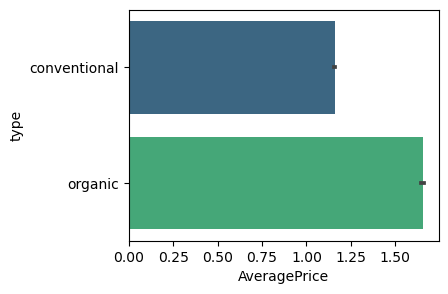

In [225]:
price_vs_type(av_df1)

Observation:  

    Organic avocados are more expensive than conventional avocados

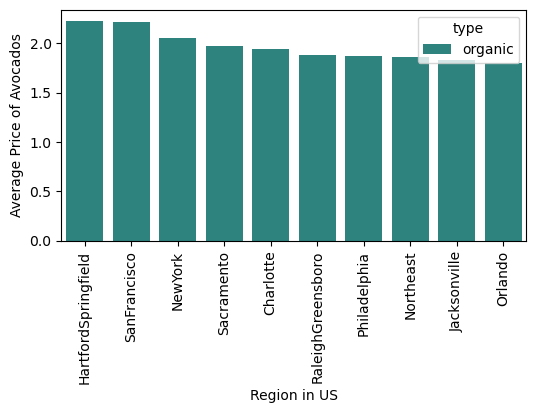

In [226]:
price_vs_region(av_df1)

Observation:  

    All throughout the years, HartfordSpringfield followed by SanFrancisco produce the most expensive avocados which are exclusively the organic type.

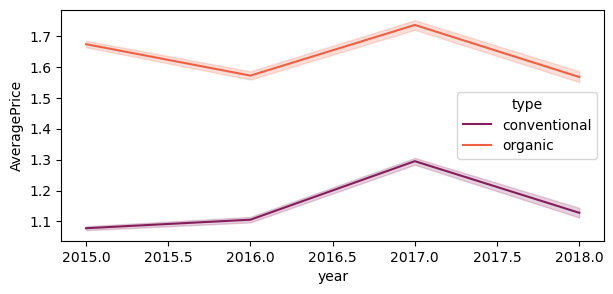

In [227]:
price_vs_year(av_df1)

Observation:  

    Throughout the years, average price of avocados hiked during the year 2017 for both the avocado types with organic avocados showing the highest price ranges

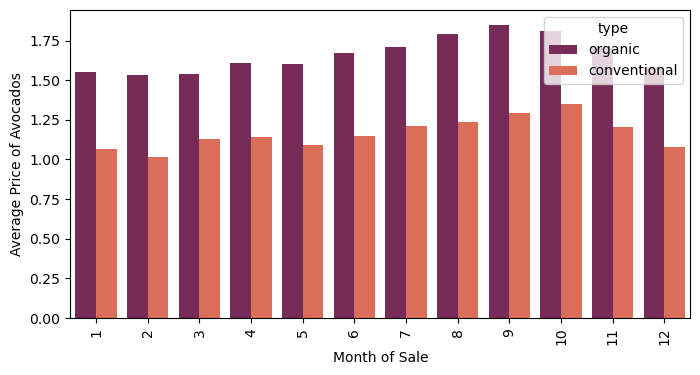

In [228]:
price_vs_month(av_df1)

Observation:  

    The average price of organic and conventional avocados peaked during the 9th month (September) and 10th month (October) respectively

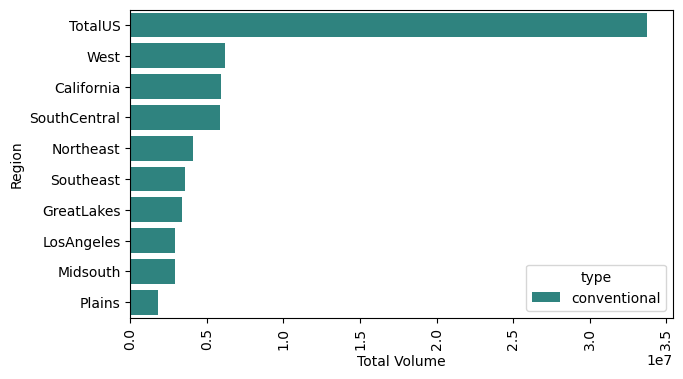

In [229]:
volume_vs_region(av_df1)

Observation:  

    Total volume of avocados sold was highest in West, California and SouthCentral regions of the US.

In [230]:
avg_price_tv(av_df1)

Average price of avocados:  1.405978409775878
Average total volume of avocados sold:  850644.0130089321
Average total volume of PLU 4046 avocados sold:  293008.4245306592
Average total volume of PLU 4225 avocados sold:  295154.56835607433
Average total volume of PLU 4770 avocados sold:  22839.73599265713


Observation:  

    In 2015-2018:
    Average price of avocados sold is 1.4 dollars
    Average number of avocados sold is  850644.01
    Average number of PLU 4046 avocados sold is 293008.42
    Average number of PLU 4225 avocados sold is 295154.56
    Average number of PLU 4770 avocados sold is 22839.73

In [231]:
# create a new column showing the specific date of the month

av_df1['Day-month']=av_df1['Day'].astype('str')+ '-' + av_df1['Month'].astype('str')

In [233]:
# create separate df for each year for year-wise analysis

av_df1_2015=av_df1[av_df1['year']==2015]
av_df1_2016=av_df1[av_df1['year']==2016]
av_df1_2017=av_df1[av_df1['year']==2017]
av_df1_2018=av_df1[av_df1['year']==2018]

In [234]:
# Price vs month-day

def price_vs_day_month(df):
    price_month =df.groupby(['Day-month','type'])['AveragePrice'].mean().sort_values(ascending=False).reset_index()

    plt.figure(figsize=(12,4))
    sns.barplot(x='Day-month', y='AveragePrice',palette='viridis',hue='type',data=price_month)

    plt.xlabel('Date of Sale')
    plt.ylabel('Average Price of Avocados')
    plt.xticks(rotation=90)
    plt.show()

ANALYSIS OF YEAR:  2015




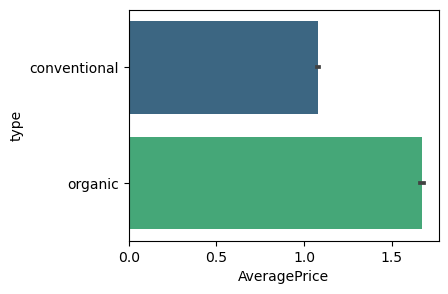

None
Average price of avocados:  1.3755903829029386
Average total volume of avocados sold:  781027.366347284
Average total volume of PLU 4046 avocados sold:  304443.4517079252
Average total volume of PLU 4225 avocados sold:  313633.8443668744
Average total volume of PLU 4770 avocados sold:  25426.96252003562
None


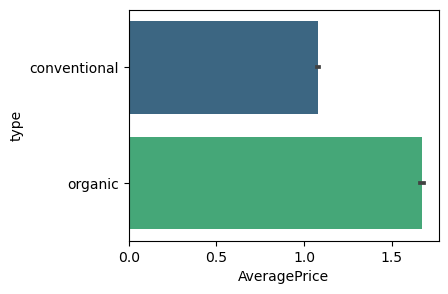

None


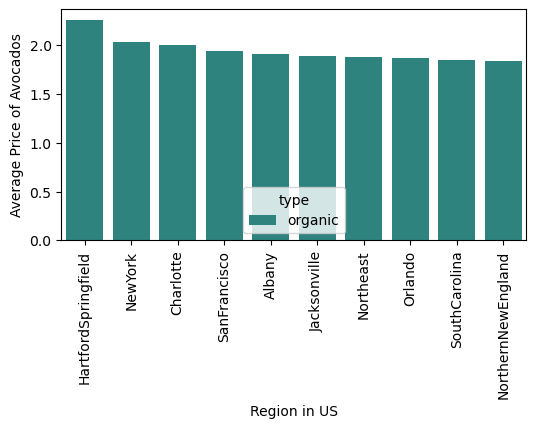

None


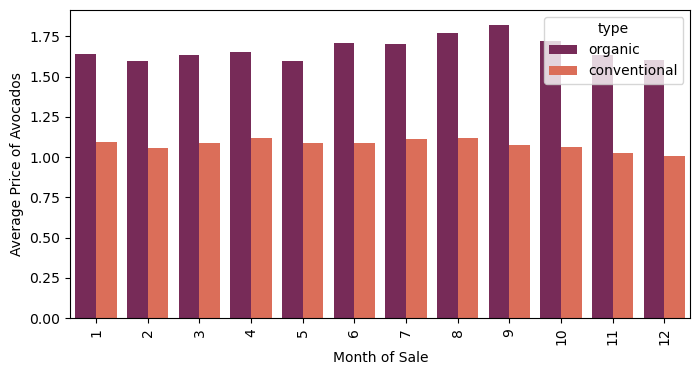

None


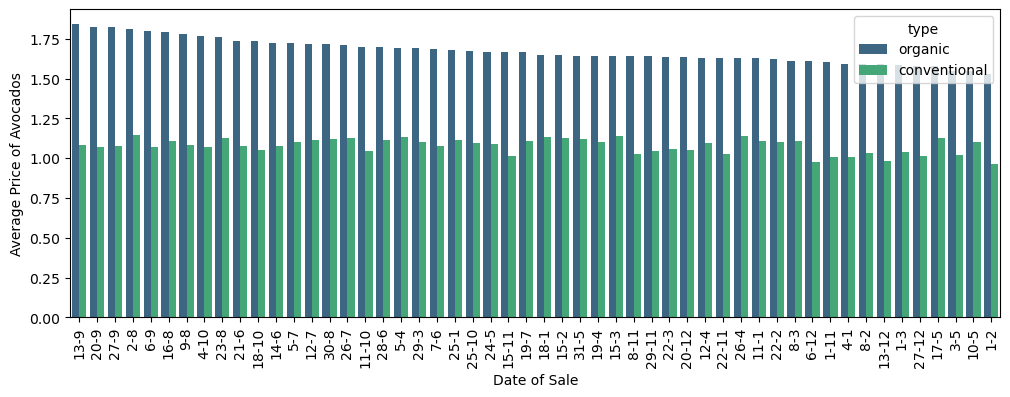

None


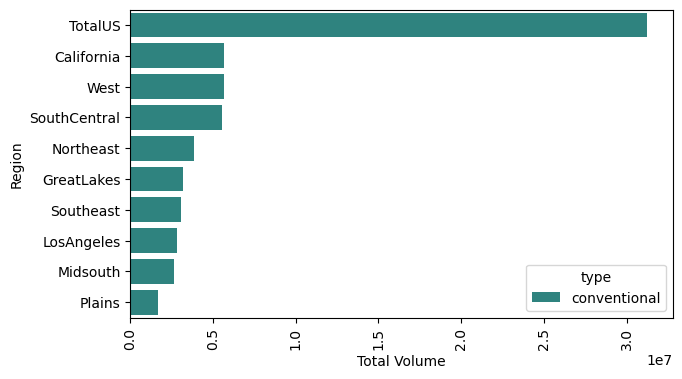

None



ANALYSIS OF YEAR:  2016




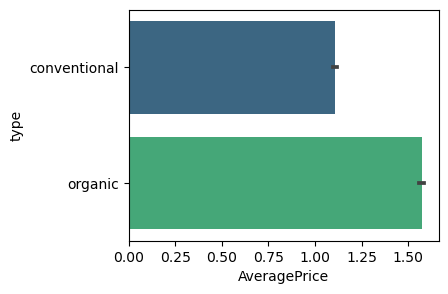

None
Average price of avocados:  1.3386396011396011
Average total volume of avocados sold:  858420.5647845442
Average total volume of PLU 4046 avocados sold:  271567.4665776354
Average total volume of PLU 4225 avocados sold:  297850.4786324786
Average total volume of PLU 4770 avocados sold:  28468.6333707265
None


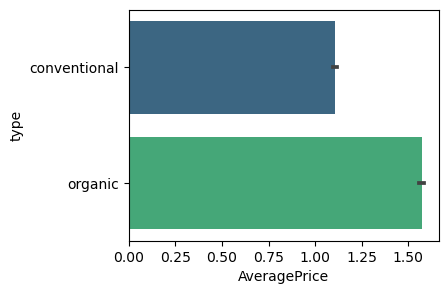

None


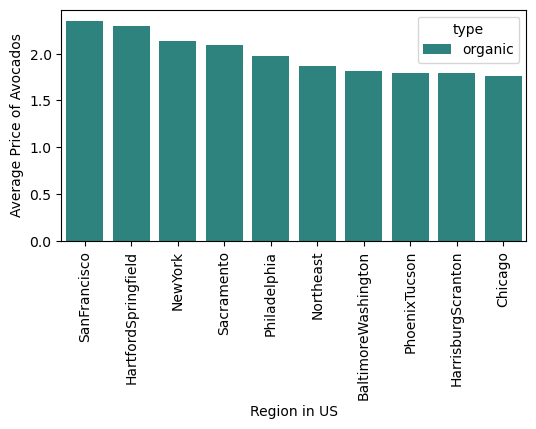

None


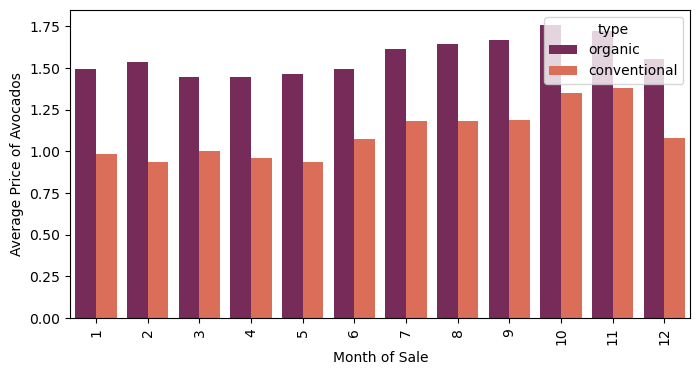

None


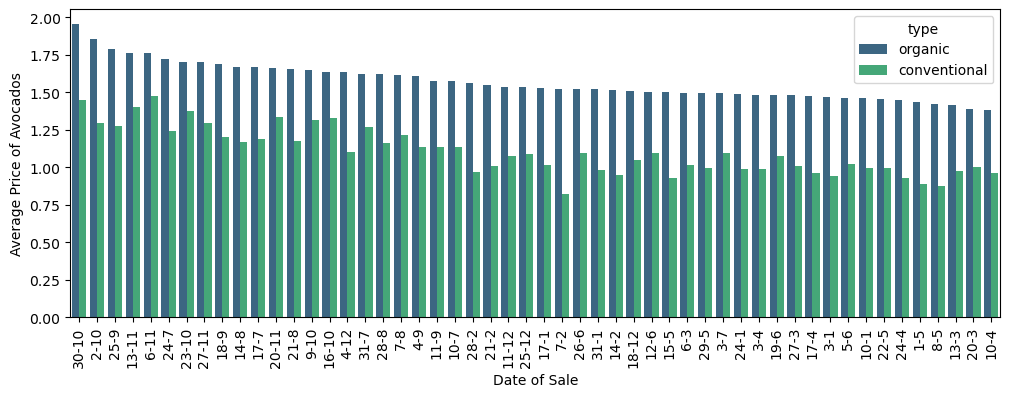

None


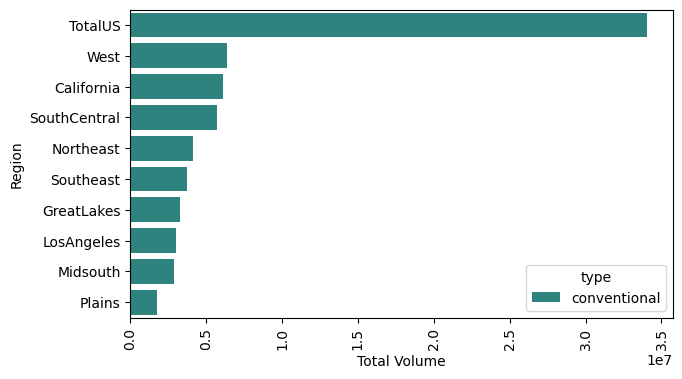

None



ANALYSIS OF YEAR:  2017




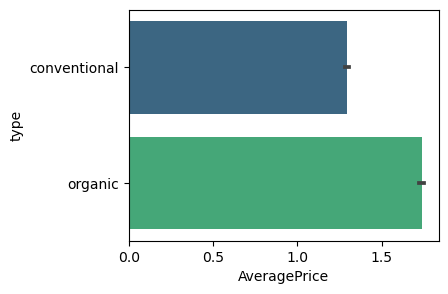

None
Average price of avocados:  1.5151275777700104
Average total volume of avocados sold:  862339.3392642434
Average total volume of PLU 4046 avocados sold:  288716.90519398806
Average total volume of PLU 4225 avocados sold:  269964.12434987765
Average total volume of PLU 4770 avocados sold:  15941.542778748686
None


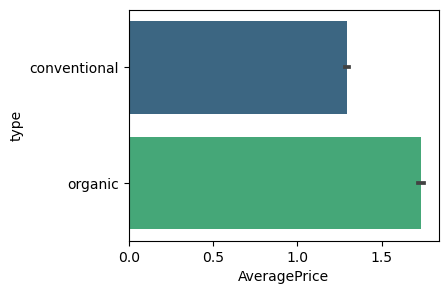

None


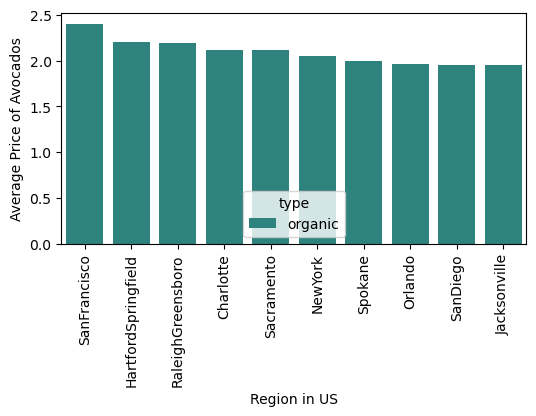

None


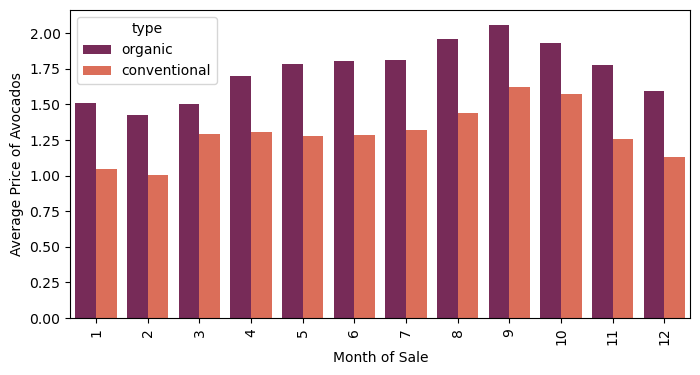

None


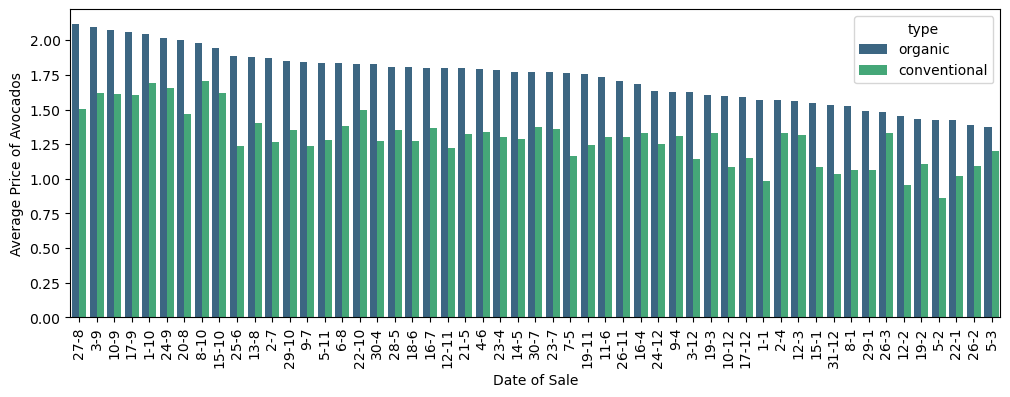

None


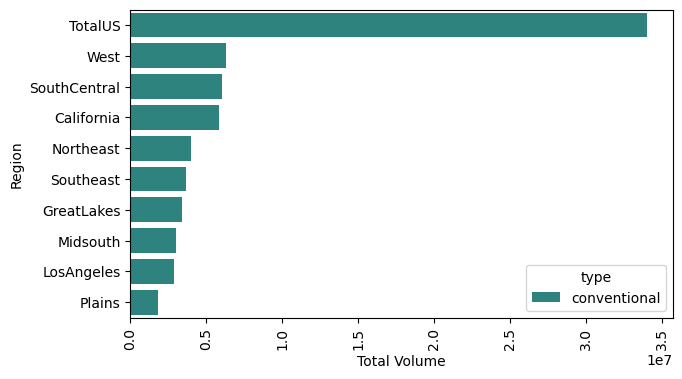

None



ANALYSIS OF YEAR:  2018




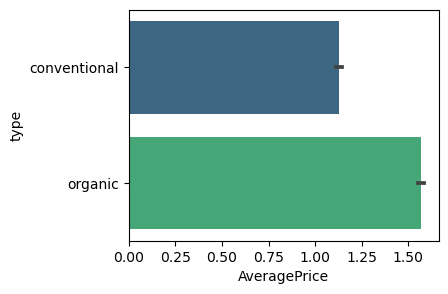

None
Average price of avocados:  1.347530864197531
Average total volume of avocados sold:  1066927.731682099
Average total volume of PLU 4046 avocados sold:  355323.868904321
Average total volume of PLU 4225 avocados sold:  314628.6066975309
Average total volume of PLU 4770 avocados sold:  17694.90338734568
None


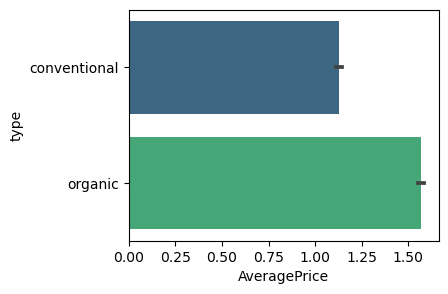

None


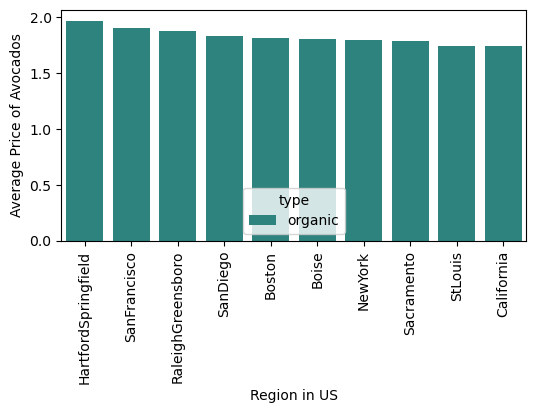

None


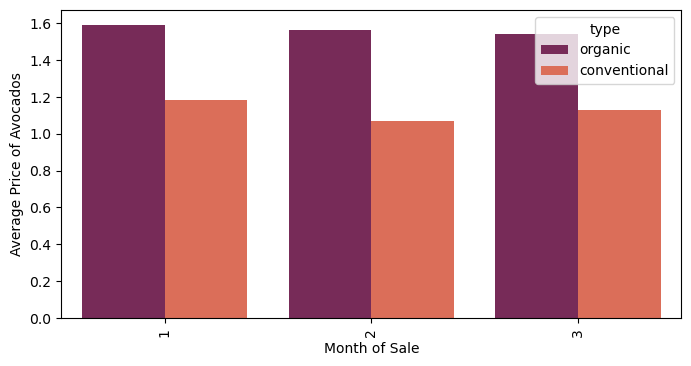

None


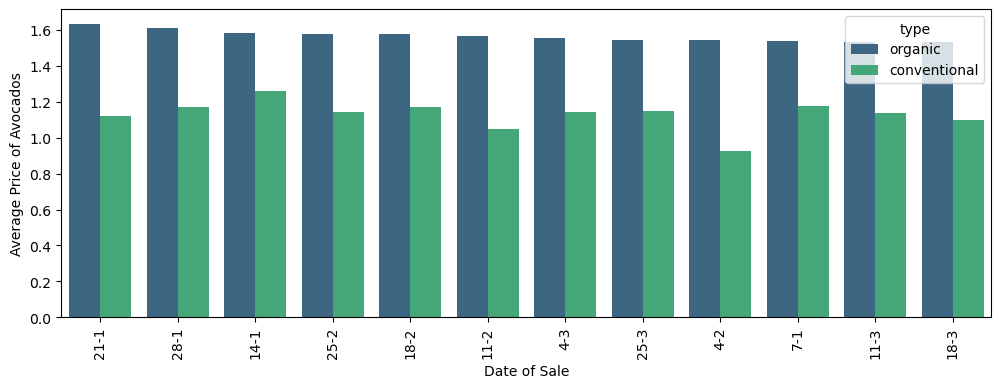

None


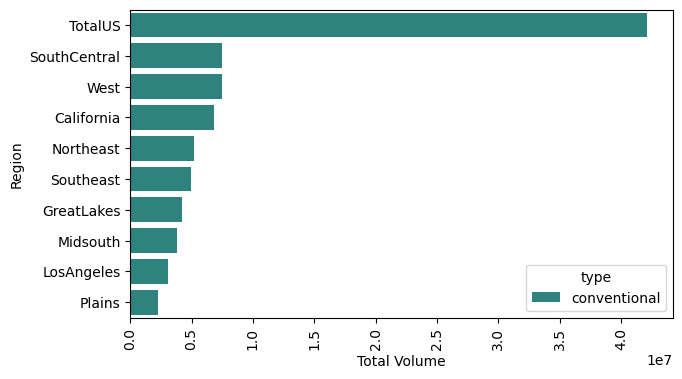

None





In [235]:
# Analysis of data YEAR-WISE

for df in [av_df1_2015,av_df1_2016,av_df1_2017,av_df1_2018]:
    print('ANALYSIS OF YEAR: ',df['year'].iloc[0])
    print('\n')
    print(price_vs_type(df))
    print(avg_price_tv(df))
    print(price_vs_type(df))
    print(price_vs_region(df))
    print(price_vs_month(df))
    print(price_vs_day_month(df))
    print(volume_vs_region(df))
    print('\n\n')

Observation:  

    Year-wise analysis:
    
    * Price of organic avocados were higher than conventional avocados in all the years
    
    2015:
    
    * Average price of avocados:  1.37 dollars
    * Average number of avocados sold:  781027.36
    * Average number of PLU 4046 avocados sold:  304443.45
    * Average number of PLU 4225 avocados sold:  313633.84
    * Average number of PLU 4770 avocados sold:  25426.96
    * HartfordSpringfield produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 9th month (Sept) and 1st, 4th, 7th and 8th months (Jan, Apr,July,Aug) respectively
    * Highest price was reported on 13-09-2015
    * Total volume of avocados sold was highest in the regions of West and California 
 
 
 
    2016:
    
    * Average price of avocados:  1.34 dollars
    * Average number of avocados sold:  858420.56
    * Average number of PLU 4046 avocados sold:  271567.46
    * Average number of PLU 4225 avocados sold:  297850.47
    * Average number of PLU 4770 avocados sold:  28468.63
    * Sanfrancisco produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 10th month (Oct) and 11th month (Nov) respectively
    * Highest price was reported on 30-10-2016
    * Total volume of avocados sold was highest in the West region
    


    2017:
    
    * Average price of avocados:  1.51 dollars
    * Average number of avocados sold:  862339.33
    * Average number of PLU 4046 avocados sold:  288716.90
    * Average number of PLU 4225 avocados sold:  269964.12
    * Average number of PLU 4770 avocados sold:  15941.54
    * Sanfrancisco produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 9th month (Sept)
    * Highest price was reported on 27-08-2017
    * Total volume of avocados sold was highest in the West region
    
    
    2018:
    
    * Average price of avocados:  1.35 dollars
    * Average number of avocados sold:  1066927.73
    * Average number of PLU 4046 avocados sold:  355323.86
    * Average number of PLU 4225 avocados sold:  314628.60
    * Average number of PLU 4770 avocados sold:  17694.90
    * HartfordSpringfield produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 1st month (Jan)  
    * Highest price was reported on 21-01-2018
    * Total volume of avocados sold was highest in the SouthCentral region 

In [236]:
av_df1.drop(['Day-month','Date'],axis=1,inplace=True)

In [237]:
# encode region column

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

av_df1['region']=le.fit_transform(av_df1['region'])
av_df1['type']=le.fit_transform(av_df1['type'])

In [238]:
av_df1.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Day               int32
Month             int32
dtype: object

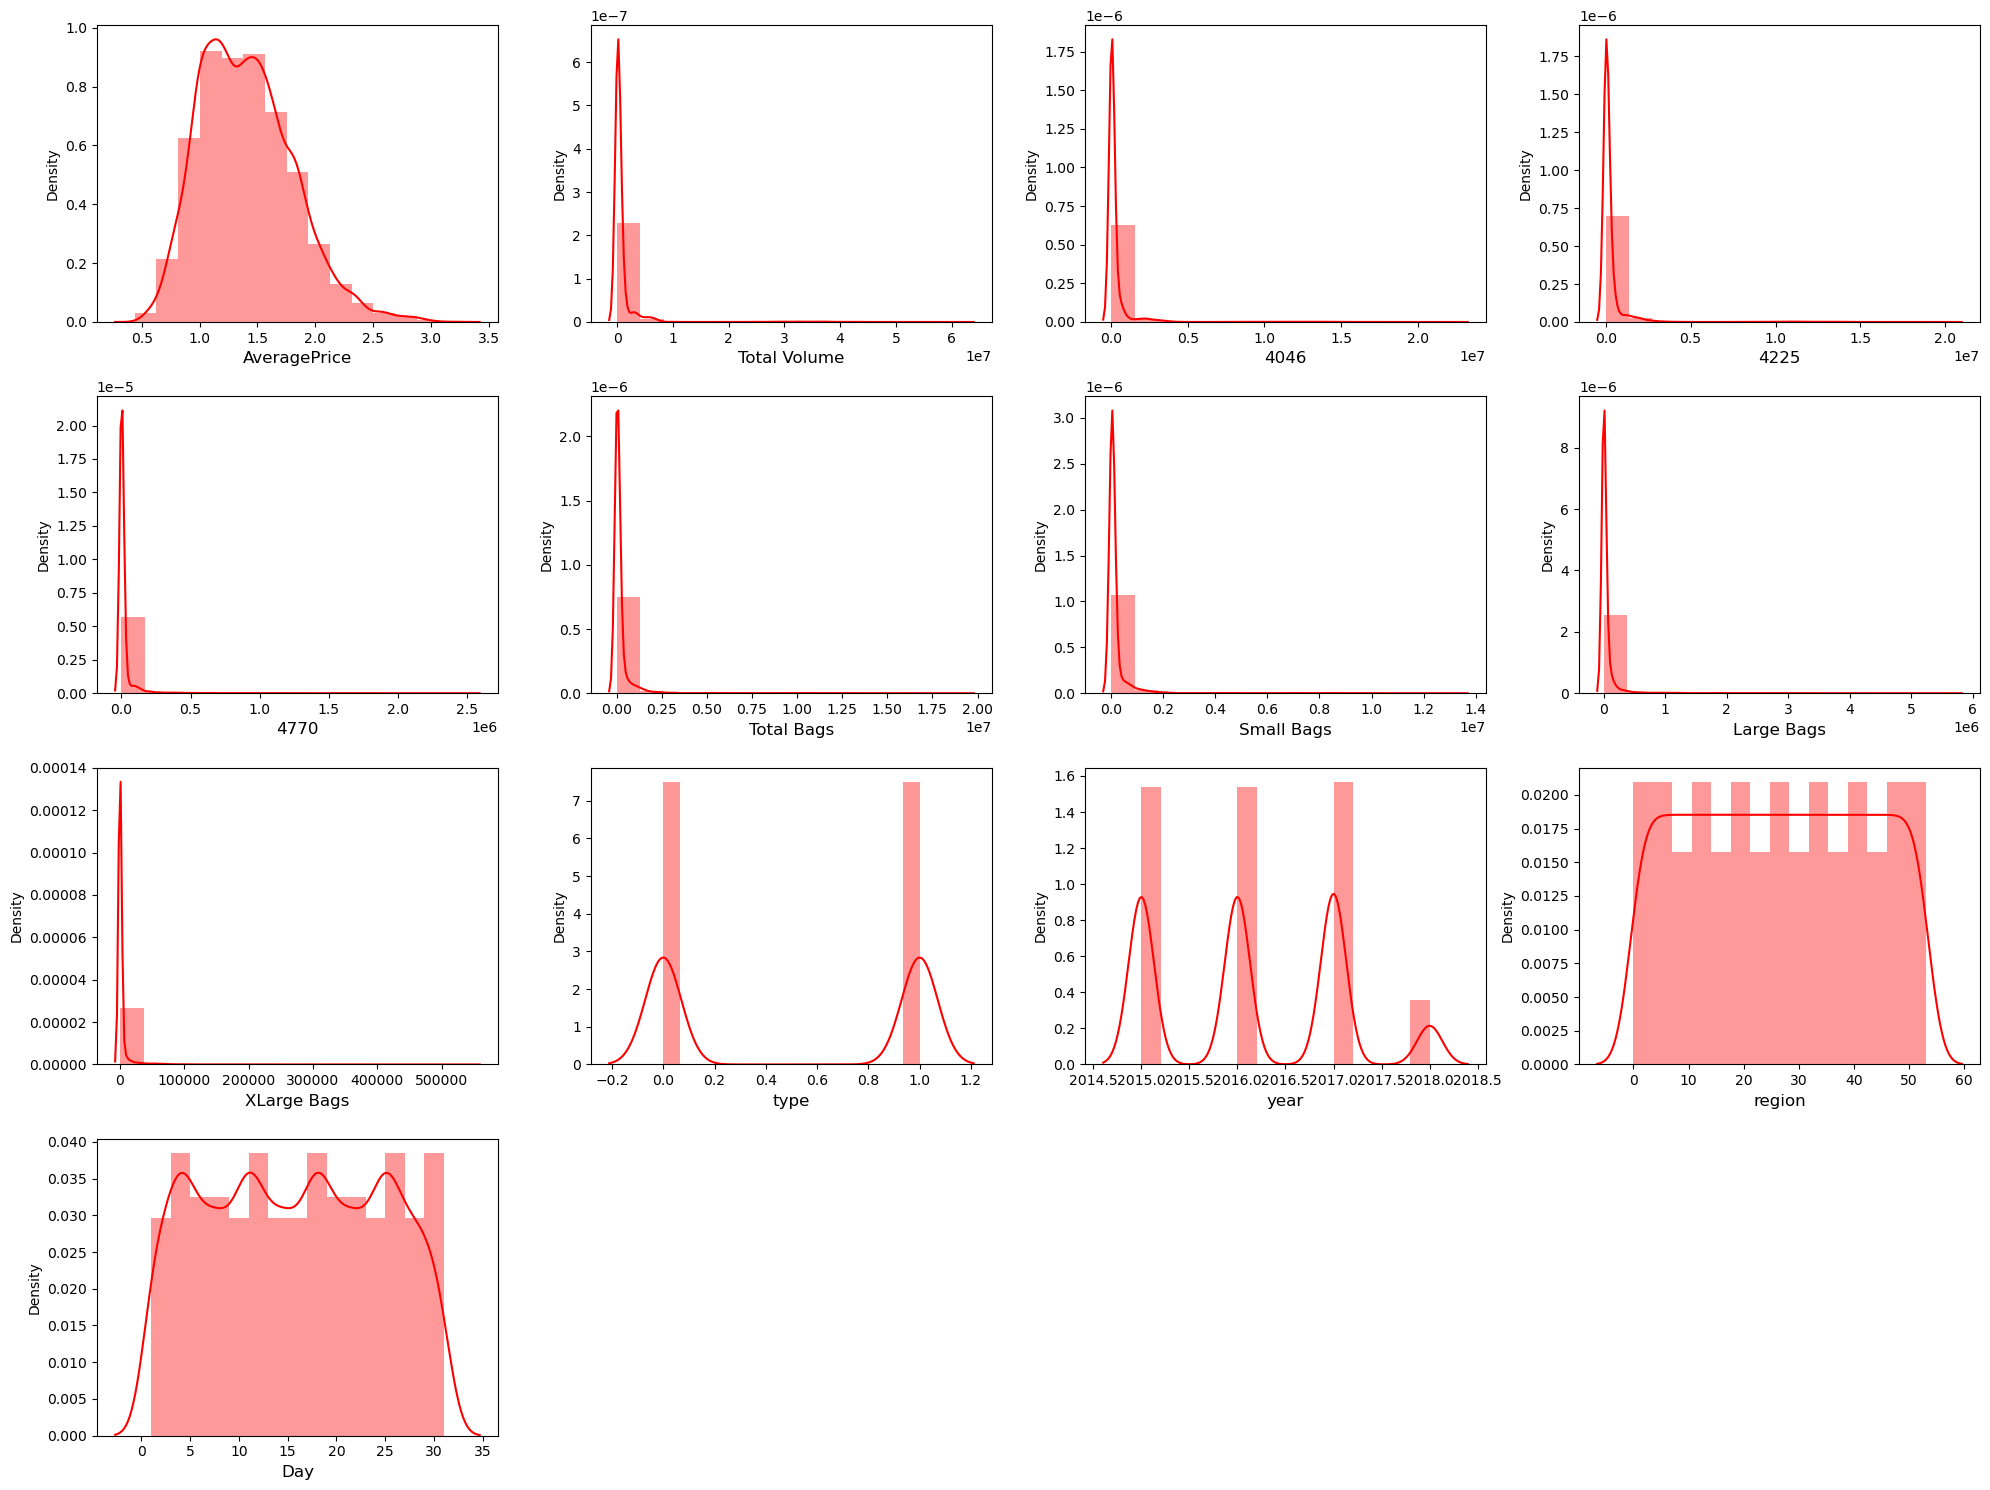

In [239]:
# check data distribution

num=av_df1.select_dtypes(include=['int','float']).columns

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=13:
        ax=plt.subplot(4,4,plot)
        sns.distplot(av_df1[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    AveragePrice and year columns are normally distributed 
    There is signifiant left-skewness in the other features
    

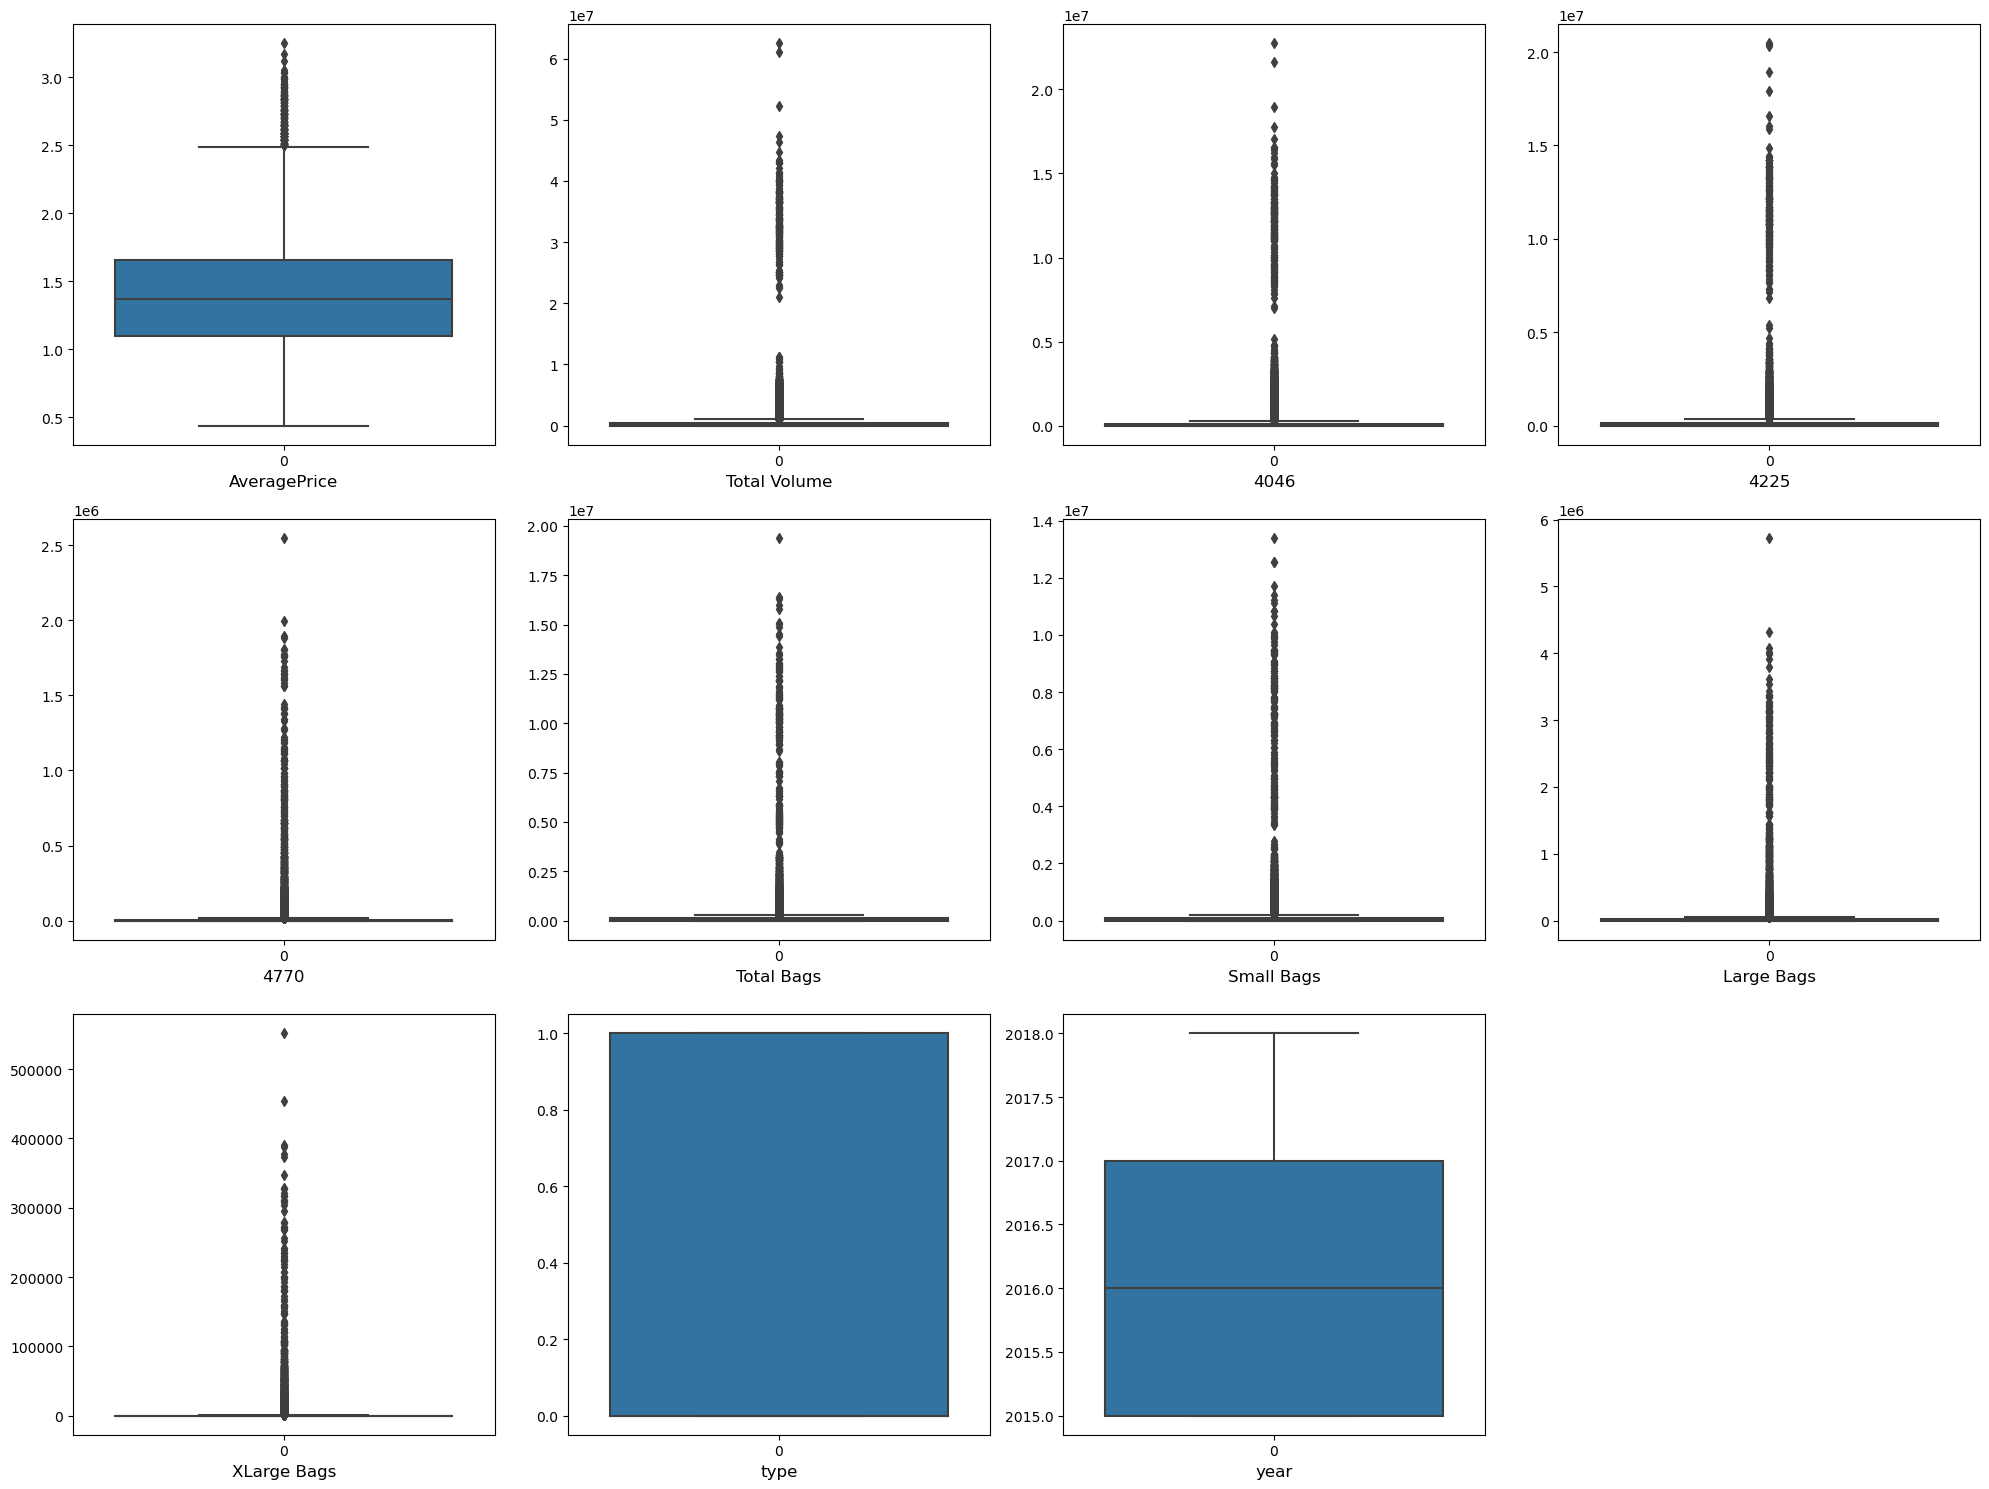

In [240]:
# check for outliers using boxplot

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(av_df1[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    There are high number of extreme datapoints
    We can remove some outliers using z-score

In [241]:
# outlier removal by z-score and saving the cleaned dataset as av_df2

from scipy.stats import zscore

num=av_df1.select_dtypes(include=['int','float']).columns
num_cbrt=np.cbrt(av_df1[num])
z=zscore(num_cbrt)
abs_z=np.abs(z)
filter_z=(abs_z<3).all(axis=1)
av_df2=av_df1[filter_z]
av_df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
52,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,0,2015,1,27,12
53,1.08,331377.53,251774.15,20702.45,103.06,58797.87,46930.26,11867.61,0.00,0,2015,1,20,12
54,0.96,417772.47,324932.28,31019.08,275.80,61545.31,38903.57,22628.21,13.53,0,2015,1,13,12
55,1.07,357636.82,283024.01,23740.85,181.92,50690.04,37032.67,13654.66,2.71,0,2015,1,6,12
56,0.99,333280.79,250288.65,28889.63,307.83,53794.68,33031.72,20738.55,24.41,0,2015,1,29,11


In [244]:
# check for skewness

av_df2.skew().sort_values(ascending=False)

XLarge Bags     5.489701
4046            5.241171
4770            5.064311
4225            4.912377
Large Bags      4.647535
Small Bags      4.299319
Total Bags      4.088880
Total Volume    4.056770
AveragePrice    0.524084
year            0.227980
Month           0.096508
Day             0.011782
region          0.002534
type           -0.104149
dtype: float64

Observation:
    
     There is high positive skewness in XLarge Bags, 4046, 4770, 4225, Large Bags, Small Bags,Total Bags and Total Volume. It can be handled by cuberoot transformation
     Slight positive skewness exists in AveragePrice and year
     Month, day and region have almost asymmetrical data
     Type has sligh negative skewness

In [245]:
for col in ['XLarge Bags', '4046', '4770', '4225', 'Large Bags', 'Small Bags','Total Bags' , 'Total Volume']:
    av_df2[col]=np.cbrt(av_df2[col])

print('Skewness of data after cuberoot transformation: \n',av_df2.skew())

Skewness of data after cuberoot transformation: 
 AveragePrice    0.524084
Total Volume    1.092352
4046            1.423423
4225            1.200471
4770            1.544282
Total Bags      1.059649
Small Bags      1.067545
Large Bags      1.184636
XLarge Bags     2.133565
type           -0.104149
year            0.227980
region          0.002534
Day             0.011782
Month           0.096508
dtype: float64


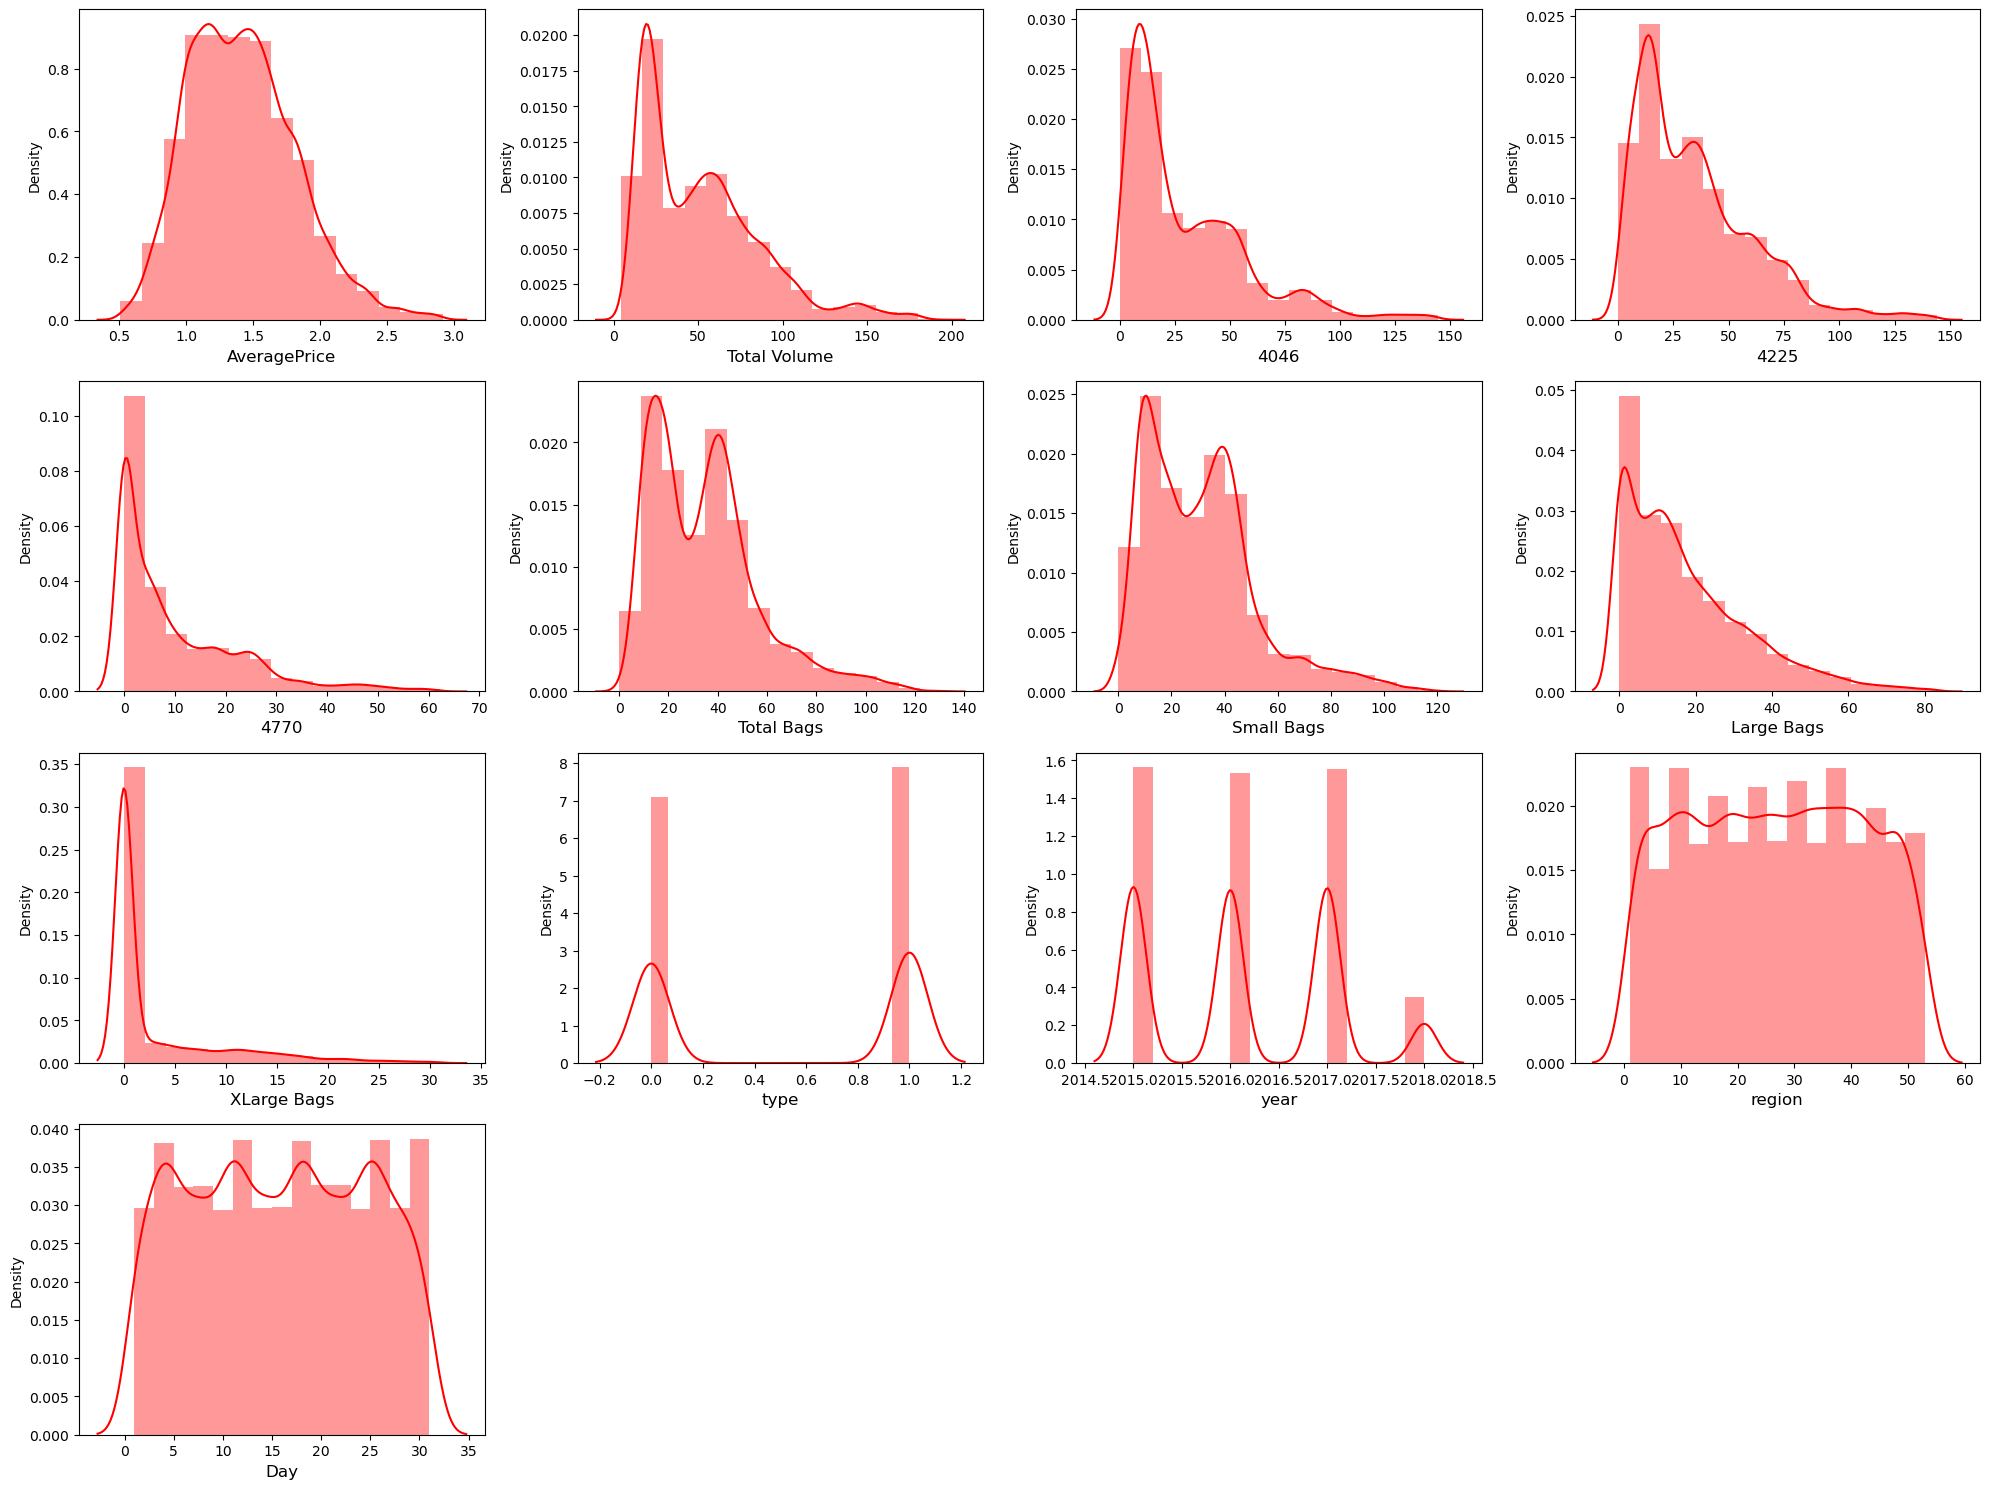

In [246]:
# check data distribution

num=av_df2.select_dtypes(include=['int','float']).columns

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=13:
        ax=plt.subplot(4,4,plot)
        sns.distplot(av_df2[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:
     
        Skewness has been reduced in the dataset as visible in the data distribution

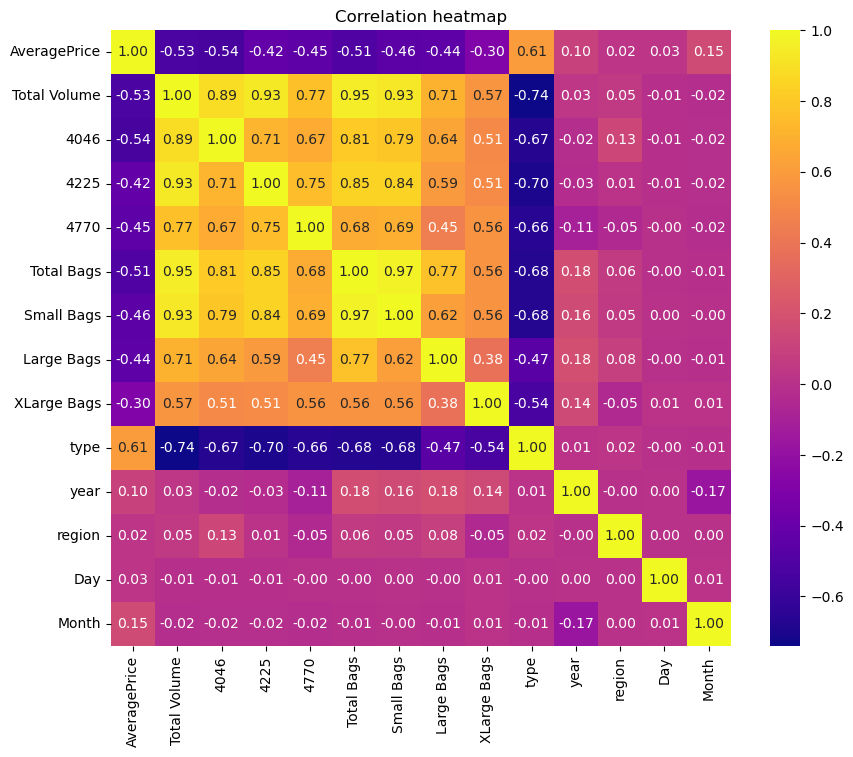

In [247]:
# check for correlation

cm= av_df2.corr()
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,cmap='plasma',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:

    AveragePrice:
    * Moderate negative correlation with - Total Volume, 4046, 4225, 4770,Total Bags, Small Bags, Large Bags
    * Positive correlation with - type
    
    Region:
    * Weak negative correlation with the other features
    * No correlation with date parameters like date, day, month, year and day-month
    
    High multicollinearity exists between total volume of avocados sold) (Total Volume, 4046, 4225, 4770) and the bag size (Total Bags, Small Bags, Large Bags and XLarge Bags). They're highly positively correlated.
    

# MODEL BUILDING & VALIDATION

# Regression Model to predict Average Price of Avocado

In [136]:
# confirm multicollinearity by vif for Regression Model

x=av_df2.drop(['AveragePrice'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,Total Volume,172.013751
4,Total Bags,100.693735
5,Small Bags,53.625333
2,4225,34.791768
1,4046,21.029457
6,Large Bags,8.524664
3,4770,2.944107
8,type,2.431273
7,XLarge Bags,1.723502
9,year,1.384173


Observation:

    We can remove top 3 columns with high vif score and check for reduction in multicollinearity
    

In [140]:
# confirm multicollinearity by vif

x=av_df2.drop(['AveragePrice','Total Bags','Total Volume','Small Bags'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,4225,3.279178
0,4046,3.060313
2,4770,2.905214
5,type,2.408950
3,Large Bags,1.966719
4,XLarge Bags,1.698479
6,year,1.196910
7,region,1.069302
9,Month,1.043261
8,Day,1.000666


Observation:

    There is significant reduction in multicollinearity now
    

In [141]:
# splitting data into features(x) and label(y)

x=av_df2.drop(['AveragePrice','Total Bags','Total Volume','Small Bags'],axis=1)
y=av_df2['AveragePrice']

In [143]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(12735, 10) (12735,) (4246, 10) (4246,)


In [144]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        cv=cross_val_score(model,x_scaled,y,cv=5).mean()
        print('R2 score: ',r2_score(y_test,y_pred2))


In [145]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.48230715846789773


In [146]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

R2 score:  -5.705910183451124e-05


In [147]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.4823084335659984


In [148]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7060790746922471


In [149]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8638373369329038


In [150]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
score(abr,x_train,y_train,x_test,y_test,train=True)
score(abr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.5156151208517914


In [151]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor(random_state=55)
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.716323345054491


In [152]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8751395425576518


In [153]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.715769401331604


In [154]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)

In [155]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'AdaBoost':abr,
        'Gradient Boosting':gbdt,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
7,XGBoost,0.875140,0.019274,0.098876,0.359034,0.516106
4,Random Forest,0.865184,0.020810,0.099798,0.264476,0.600708
6,Gradient Boosting,0.716323,0.043788,0.156174,0.391514,0.324809
8,SVM,0.715769,0.043874,0.151457,-0.307052,1.022821
3,Decision Tree,0.708781,0.044953,0.137379,-0.193244,0.902025
5,AdaBoost,0.515724,0.074753,0.219879,0.061293,0.454431
2,Ridge,0.482308,0.079911,0.218540,0.092483,0.389825
0,Linear Regression,0.482307,0.079911,0.218541,0.092546,0.389761
1,Lasso,-0.000057,0.154369,0.315657,-0.372374,0.372317


Observation:

    We can select XGBoost model as it has the highest r2 score.  MSE and MAE is also lesser. We could improve cross validation score by hyperparameter tuning

In [156]:
# Hyperparameter tuning of XGBoost model

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,250,50),
        'learning_rate': [0.01,0.05,0.08,0.1]}

rs= RandomizedSearchCV(estimator=xgbr,param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for XGBoost model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for XGBoost model: {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 6, 'learning_rate': 0.08} 
 Best score: 0.7903490494874295


In [157]:
# Tuned XGBoost (manual tuning also done)

xgbr_1=xgb.XGBRegressor(random_state=55,n_estimators= 300, min_samples_split= 4, max_depth= 7, learning_rate= 0.09)
xgbr_1.fit(x_train,y_train)

score(xgbr_1,x_train,y_train,x_test,y_test,train=True)
score(xgbr_1,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.892075508355638


In [158]:
# compare tuned model with untuned one

models={'XGBoost':xgbr,'Tuned XGBoost':xgbr_1 }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned XGBoost,0.892076,0.016659,0.090024,0.375301,0.516775
0,XGBoost,0.875140,0.019274,0.098876,0.359034,0.516106


Observation:  

    Hyperparameter tuning has improved the R2 score and cross validation score while decreased the MSE and MAE.
    So we could save this tuned model.
    Tuned XGBoost Regressor model show 89.2% test accuracy!


In [161]:
# save the model

pickle.dump(xgbr_1, open('Avocado_Price_Prediction_xgbr1.pkl','wb'))

In [162]:
# load model and view predicted vs actual prices

Avocado_Price_Prediction_model = pickle.load(open('Avocado_Price_Prediction_xgbr1.pkl','rb'))
y_pred = Avocado_Price_Prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted Price':y_pred,'Actual Price':y_test})
result.head()

,Predicted Price,Actual Price
15551,1.877137,1.84
9264,1.574853,1.66
4868,0.924815,0.94
5374,1.393067,1.44
9442,1.665868,1.75


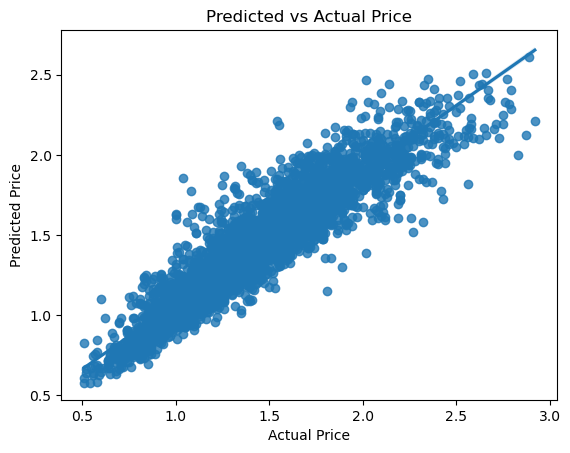

In [163]:
# plot Predicted vs Actual Price
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Observation:  

    The XGBoost Regressor model was able to predict Avocado price much closer to the actual price with few exceptions as visible by the spread of datapoints outside the regression line in the regplot.

# Classification Model to predict the region/source of Avocado

In [165]:
region_items=av_df['region'].value_counts()
pd.DataFrame(region_items)

,count
region,
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338


Observation:

    Since data is equally distributed among all regions, we can proceed with the data.

In [166]:
# check multicollinearity by vif for classification problem

x=av_df2.drop(['region'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,Total Volume,171.310620
5,Total Bags,103.090220
6,Small Bags,55.902455
3,4225,36.015455
2,4046,20.136480
7,Large Bags,8.593919
9,type,2.960371
4,4770,2.926897
0,AveragePrice,2.099668
8,XLarge Bags,1.724508


In [167]:
x=av_df2.drop(['region','Total Bags','Total Volume'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
4,Small Bags,5.625662
2,4225,5.085683
1,4046,3.640413
7,type,2.942084
3,4770,2.885975
5,Large Bags,2.083862
0,AveragePrice,1.939437
6,XLarge Bags,1.712102
8,year,1.443201
10,Month,1.122335


Observation:

    There is significant reduction in multicollinearity now

In [168]:
# splitting data into features(x) and label(y)

X=av_df2.drop(['region','Total Bags','Total Volume'],axis=1) 
Y=av_df2['region']

In [170]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=67)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(12735, 11) (12735,) (4246, 11) (4246,)


In [178]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,X_test,Y_test,train=True):
    if train:
        Y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,Y_pred1))
    else:
        Y_pred2= model.predict(X_test)
        print('Accuracy of test set: ',accuracy_score(Y_test,Y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(Y_test,Y_pred2,digits=2)}')
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,X,Y,cv=7).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')


In [179]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial')
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,X_test,Y_test,train=True)
score(lr,X_train,Y_train,X_test,Y_test,train=False)

cv(lr)

Accuracy of train set:  0.5045151158225363
Accuracy of test set:  0.49175694771549694

Classification report of LogisticRegression(multi_class='multinomial') model  :

               precision    recall  f1-score   support

           1       0.38      0.35      0.37        85
           2       0.71      0.65      0.68        86
           3       0.49      0.46      0.48        82
           4       0.54      0.53      0.53        95
           5       0.39      0.48      0.43        90
           6       0.74      0.79      0.77        58
           7       0.56      0.73      0.63        91
           8       0.67      0.86      0.75        78
           9       0.38      0.73      0.50        79
          10       0.60      0.29      0.39        89
          11       0.41      0.55      0.47        77
          12       0.46      0.49      0.48        80
          13       0.48      0.38      0.43        78
          14       0.61      0.45      0.52        78
          15       0

In [180]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,X_test,Y_test,train=True)
score(knn,X_train,Y_train,X_test,Y_test,train=False)
cv(knn)

Accuracy of train set:  0.73647428347075
Accuracy of test set:  0.5527555346208196

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           1       0.26      0.49      0.34        85
           2       0.57      0.85      0.68        86
           3       0.38      0.65      0.48        82
           4       0.47      0.58      0.52        95
           5       0.29      0.41      0.34        90
           6       0.83      0.93      0.88        58
           7       0.40      0.65      0.49        91
           8       0.79      0.83      0.81        78
           9       0.33      0.46      0.38        79
          10       0.25      0.46      0.32        89
          11       0.49      0.71      0.58        77
          12       0.79      0.72      0.76        80
          13       0.41      0.44      0.42        78
          14       0.45      0.58      0.51        78
          15       0.86      0.77      0.81   

In [181]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,X_test,Y_test,train=True)
score(dt,X_train,Y_train,X_test,Y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.7967498822421102

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           1       0.74      0.61      0.67        85
           2       0.89      0.90      0.89        86
           3       0.74      0.80      0.77        82
           4       0.88      0.83      0.85        95
           5       0.78      0.72      0.75        90
           6       0.98      0.93      0.96        58
           7       0.80      0.84      0.82        91
           8       0.94      0.97      0.96        78
           9       0.74      0.89      0.80        79
          10       0.66      0.69      0.67        89
          11       0.81      0.91      0.86        77
          12       0.83      0.74      0.78        80
          13       0.71      0.67      0.69        78
          14       0.75      0.83      0.79        78
          15       0.95      0.95      0.95        57
   

In [182]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,X_test,Y_test,train=True)
score(rf,X_train,Y_train,X_test,Y_test,train=False)
cv(rf)

Accuracy of train set:  1.0
Accuracy of test set:  0.9206311822892134

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           1       0.91      0.92      0.91        85
           2       0.99      0.98      0.98        86
           3       0.92      0.84      0.88        82
           4       0.99      0.96      0.97        95
           5       0.92      0.86      0.89        90
           6       1.00      0.95      0.97        58
           7       0.94      0.91      0.93        91
           8       0.99      1.00      0.99        78
           9       0.90      0.96      0.93        79
          10       0.87      0.92      0.90        89
          11       0.90      0.96      0.93        77
          12       0.95      0.96      0.96        80
          13       0.88      0.85      0.86        78
          14       0.90      0.95      0.92        78
          15       1.00      0.96      0.98        57
   

In [183]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,X_test,Y_test,train=True)
score(svc,X_train,Y_train,X_test,Y_test,train=False)
cv(svc)

Accuracy of train set:  0.7516293678837849
Accuracy of test set:  0.7032501177578898

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           1       0.45      0.40      0.43        85
           2       0.94      0.85      0.89        86
           3       0.70      0.55      0.62        82
           4       0.77      0.69      0.73        95
           5       0.65      0.53      0.59        90
           6       0.96      0.93      0.95        58
           7       0.66      0.84      0.74        91
           8       0.96      0.97      0.97        78
           9       0.62      0.70      0.66        79
          10       0.53      0.55      0.54        89
          11       0.58      0.83      0.68        77
          12       0.84      0.80      0.82        80
          13       0.59      0.53      0.55        78
          14       0.73      0.88      0.80        78
          15       0.95      0.93      0.94  

In [184]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,X_test,Y_test,train=True)
score(gbc,X_train,Y_train,X_test,Y_test,train=False)
cv(gbc)

Accuracy of train set:  0.9806831566548881
Accuracy of test set:  0.8358455016486105

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           1       0.76      0.74      0.75        85
           2       0.91      0.97      0.94        86
           3       0.77      0.72      0.74        82
           4       0.91      0.82      0.86        95
           5       0.83      0.80      0.81        90
           6       1.00      0.91      0.95        58
           7       0.88      0.87      0.87        91
           8       0.97      0.95      0.96        78
           9       0.85      0.86      0.86        79
          10       0.78      0.76      0.77        89
          11       0.86      0.91      0.89        77
          12       0.91      0.86      0.88        80
          13       0.79      0.78      0.79        78
          14       0.78      0.87      0.82        78
          15       1.00      0.86     

Observations:  

    Random Forest seems to perform better than the other models based on the test accuracy and cross validation scores.
    Test accuracy = 0.92
    Cross validation score = 0.75 
    As train accuracy = 1.0, it shows signs of overfitting. We can try to improve the scores by hyperparameter tuning.

In [191]:
# Hyperparameter tuning of the selected model (Random Forest) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250], 'criterion':['gini','entropy'], 'max_depth':range(1,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

rs=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 250, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 16, 'criterion': 'entropy'} and best score is : 0.592226148409894


In [192]:
# Tuned Random Forest model

rf1=rs.best_estimator_

rf1.fit(X_train,Y_train)

score(rf1,X_train,Y_train,X_test,Y_test,train=True)
score(rf1,X_train,Y_train,X_test,Y_test,train=False)
cv(rf1)

Accuracy of train set:  0.6188457008244994
Accuracy of test set:  0.6078662270372115

Classification report of RandomForestClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=20,
                       min_samples_leaf=2, n_estimators=250) model  :

               precision    recall  f1-score   support

           1       0.61      0.60      0.61        85
           2       0.78      0.77      0.77        86
           3       0.50      0.78      0.61        82
           4       0.93      0.56      0.70        95
           5       0.94      0.38      0.54        90
           6       0.85      0.60      0.71        58
           7       0.64      0.68      0.66        91
           8       0.58      0.86      0.69        78
           9       0.44      0.84      0.58        79
          10       0.68      0.45      0.54        89
          11       0.64      0.75      0.69        77
          12       0.70      0.85      0.77        80
          13       0.71      0.38    

Observation:  

    Hyperparameter tuning has not improved the accuracy score and cross validation score.
    The initial Random Forest (rf) model is the better model in this case based on the metrics score. It has better test accuracy and better cross validation score than the tuned model.
    So we could save the initial model.
    
    Selected model:-
    
        Model: Random Forest
        Train Accuracy: 100%
        Test Accuracy: 92%
        Cross validation score: 75%

In [194]:
# Save random forest model

pickle.dump(rf, open('Avocado_region_prediction_rf_model.pkl','wb'))

In [197]:
# load model and view prediction vs actual region

Avocado_region_prediction_model=pickle.load(open('Avocado_region_prediction_rf_model.pkl','rb'))
Y_pred=Avocado_region_prediction_model.predict(X_test)

result=pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
result.head()

,Predicted,Actual
15551,15,15
9264,2,2
4868,39,39
5374,49,49
9442,6,6


Observation:  

    The Random Forest Classifier model (rf) was able to predict the region/source of Avocado as confirmed by the above table

# Overall Summary

The dataset on "Avocado Retail Sales" was used to analyse and build machine learning models to predict the average price of avocado (Regression model) and predict the region (Classification model) based on different features.

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, renaming of columns, outlier removal, managing skewness 
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering - creation of new columns such as date, month and date-month for data analysis and modelling purpose; scaling of data
4. Model training and evaluation- trained 9 models for the regression problem and 6 models for classification problem; evaluated the models using appropriate metrics to find the best model


# Data Insights

    OVERALL ANALYSIS:

    * The dataset contains information spanning from  2015-2018  
    * Dataset include details of 2 types of avocados across 54 regions in the United States
    * Average price of single avocados range from $0.44 to $3.25

    * All throughout the years, HartfordSpringfield, shortly followed by SanFrancisco,  produced the most expensive avocados which are exclusively the organic type.
    * Throughout the years, average price of avocados hiked during the year 2017 for both the avocado types with organic avocados showing the highest price ranges
    * The average price of organic and conventional avocados peaked during the 9th month (September) and 10th month (October) respectively
    * Total volume of avocados sold was highest in West, California and SouthCentral regions of the US.
    * Average price of avocados:  1.405978409775878
    * Number of avocados sold:  850644.0130089321
    * Number of PLU 4046 avocados sold:  293008.4245306592
    * Number of PLU 4225 avocados sold:  295154.56835607433
    * Number of PLU 4770 avocados sold:  22839.73599265713

    YEAR-WISE ANALYSIS:
    
    * Price of organic avocados were higher than conventional avocados in all the years
    
    2015:
    
    * Average price of avocados:  1.37 dollars
    * Average number of avocados sold:  781027.36
    * Average number of PLU 4046 avocados sold:  304443.45
    * Average number of PLU 4225 avocados sold:  313633.84
    * Average number of PLU 4770 avocados sold:  25426.96
    * HartfordSpringfield produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 9th month (Sept) and 1st, 4th, 7th and 8th months (Jan, Apr,July,Aug) respectively
    * Highest price was reported on 13-09-2015
    * Total volume of avocados sold was highest in the regions of West and California 
 
 
 
    2016:
    
    * Average price of avocados:  1.34 dollars
    * Average number of avocados sold:  858420.56
    * Average number of PLU 4046 avocados sold:  271567.46
    * Average number of PLU 4225 avocados sold:  297850.47
    * Average number of PLU 4770 avocados sold:  28468.63
    * Sanfrancisco produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 10th month (Oct) and 11th month (Nov) respectively
    * Highest price was reported on 30-10-2016
    * Total volume of avocados sold was highest in the West region
    


    2017:
    
    * Average price of avocados:  1.51 dollars
    * Average number of avocados sold:  862339.33
    * Average number of PLU 4046 avocados sold:  288716.90
    * Average number of PLU 4225 avocados sold:  269964.12
    * Average number of PLU 4770 avocados sold:  15941.54
    * Sanfrancisco produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 9th month (Sept)
    * Highest price was reported on 27-08-2017
    * Total volume of avocados sold was highest in the West region
    
    
    2018:
    
    * Average price of avocados:  1.35 dollars
    * Average number of avocados sold:  1066927.73
    * Average number of PLU 4046 avocados sold:  355323.86
    * Average number of PLU 4225 avocados sold:  314628.60
    * Average number of PLU 4770 avocados sold:  17694.90
    * HartfordSpringfield produced the most expensive avocados which were exclusively the organic type.   
    * The average price of organic and conventional avocados peaked during the 1st month (Jan)  
    * Highest price was reported on 21-01-2018
    * Total volume of avocados sold was highest in the SouthCentral region 
  

# Selected model

* Regression model

    XGBoost Regressor model was found to be the best model for the regression task to predict the average price of avocados. R2 score is comparitively the highest indicating that the model can successfully explain 89.2% of variance in the dataset. The model was selected based on below metrics:

   * R2 score: 0.892
   * Cross Validation: 0.375
   * MSE: 0.016
   * MAE: 0.090
   
* Classification model

    Random Forest Classifier model was found to be the best model for the classification task to predict the region/source of avocados. The model was selected based on below metrics:

   * Train Accuracy: 1.0
   * Test Accuracy: 0.92
   * Cross validation score: 0.75   
